# Bloque 1: Naturaleza de las series de tiempo

Melanie Oyarzún W.


**Resultado de aprendizaje esperado:**

Identificar datos de series temporales, sus particularidades y riesgos, en el contexto de posibles aplicaciones profesionales.

**Bibliografía recomendada:**

Stock & Watson, C.14 [link](https://www.dropbox.com/s/d09qcat340jy5q2/stock%20y%20watson%20-%20Introduccion%20a%20la%20Econometria.pdf?dl=0) ; Wooldridge, c.12 [link](https://www.dropbox.com/s/wrh0tuna27qp747/Wooldridge__Introductory_Econometrics_2nd_Ed_Solutions.pdf?dl=0), Gujarati, c.12  [link](https://www.dropbox.com/s/rrvth8vsa1c5gts/Gujarati-cap%2012.pdf?dl=0)

**Material de apoyo***

El taller cuenta con un repositorio  [https://github.com/melanieoyarzun/taller_IDS2021](https://github.com/melanieoyarzun/taller_IDS2021) en el cual está dispoinible todo el material.

**Slides**

Estan disponibles en el repositorio o directamente en el link 

---

In [1]:
# Paquetes y settings

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import watermark


#%matplotlib inline
%load_ext watermark

# setting de graficos

plt.figure(figsize=(5,3), dpi= 200, facecolor='w', edgecolor='k')


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Git hash: aef3c6ddbb2a0445b60074d46581d039a1946002

seaborn   : 0.11.2
pandas    : 1.3.4
watermark : 2.2.0
sys       : 3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
numpy     : 1.20.3
matplotlib: 3.4.3



# Tipos de datos

Los datos que analizamos con modelos se pueden categorizar en tres grandes tipos: 

- corte transversal 
- series de tiempo (o longitudinal)
- panel

## Corte transversal
Cuando se empieza a estudiar modelamiento de datos, la aplicación natural de estos es en lo que llamamos datos de corte transversal. En estos, la **unidad de observación** son individuos separados unos de otros. 

Usualmente, cada fila reprsenta un individuo (personas, familias, empresas) en un momento del tiempo específico (mismo año, mismo mes, etc). Es análogo a una *fotografía* de do grupo.


Un ejemplo de esto es la encuesta Casen [(http://observatorio.ministeriodesarrollosocial.gob.cl/encuesta-casen)](http://observatorio.ministeriodesarrollosocial.gob.cl/encuesta-casen) o Encuesta de Caracterización Socioeconómica Nacional.

Esta es una encuesta de caracter nacional realizada a hogares, en la cual se busca levantar información para conocer la situación de los hogares y de la población, especialmente de aquella en situación de pobreza y de aquellos grupos definidos como prioritarios y permite evaluar impacto de política social. Es representativa a nivel regional.

Es realizada por el Ministerio de Desarrollo Social desde el año 1990 con una periodicidad; bianual o trianual. Hasta ahora, las encuestas aplicadas corresponden a los años 1990, 1992, 1994, 1996, 1998, 2000, 2003, 2006, 2009, 2011, 2013, 2105 y 2017.

In [3]:
df_casen2020= pd.read_stata("Data/casen_2020_ingresos.dta")
df_casen2020.head(10)

,folio,o,id_persona,region,comuna,zona,expr,edad,sexo,tot_per,...,esc2,educ,o1,yaut,yauth,yautcor,yautcorh,ytrabajocor,ytrabajocorh,yae
0,1.101100e+11,1,5,Región de Tarapacá,Iquique,Urbano,67,34,Mujer,2,...,12.0,Media humanista completa,No,220000.0,300000,220000.0,300000,150000.0,150000.0,240586.0
1,1.101100e+11,2,6,Región de Tarapacá,Iquique,Urbano,67,4,Mujer,2,...,NaN,Sin educación formal,NaN,80000.0,300000,80000.0,300000,NaN,150000.0,240586.0
2,1.101100e+11,2,31,Región de Tarapacá,Iquique,Urbano,67,5,Mujer,3,...,NaN,Básica incompleta,NaN,25000.0,941583,25000.0,941583,NaN,891583.0,439170.0
3,1.101100e+11,1,32,Región de Tarapacá,Iquique,Urbano,67,45,Hombre,3,...,15.0,Técnico nivel superior incompleta,Sí,889500.0,941583,889500.0,941583,889500.0,891583.0,439170.0
4,1.101100e+11,3,30,Región de Tarapacá,Iquique,Urbano,67,19,Mujer,3,...,NaN,No sabe,No,27083.0,941583,27083.0,941583,2083.0,891583.0,439170.0
5,1.101100e+11,2,117,Región de Tarapacá,Iquique,Urbano,67,57,Hombre,3,...,16.0,Técnico nivel superior completo,Sí,3000000.0,3004167,3000000.0,3004167,3000000.0,3004167.0,1522295.0
6,1.101100e+11,3,118,Región de Tarapacá,Iquique,Urbano,67,20,Hombre,3,...,14.0,Técnico nivel superior incompleta,No,NaN,3004167,NaN,3004167,NaN,3004167.0,1522295.0
7,1.101100e+11,1,116,Región de Tarapacá,Iquique,Urbano,67,56,Mujer,3,...,15.0,Técnico nivel superior completo,No,4167.0,3004167,4167.0,3004167,4167.0,3004167.0,1522295.0
8,1.101100e+11,1,2209,Región de Tarapacá,Iquique,Urbano,67,77,Hombre,2,...,10.0,Media técnica profesional incompleta,No,1250.0,128250,1250.0,128250,NaN,0.0,375653.0
9,1.101100e+11,2,2210,Región de Tarapacá,Iquique,Urbano,67,60,Mujer,2,...,12.0,Media humanista completa,No,127000.0,128250,127000.0,128250,NaN,0.0,375653.0


In [4]:
df_casen2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185437 entries, 0 to 185436
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   folio         185437 non-null  float64 
 1   o             185437 non-null  int8    
 2   id_persona    185437 non-null  int16   
 3   region        185437 non-null  category
 4   comuna        185437 non-null  category
 5   zona          185437 non-null  category
 6   expr          185437 non-null  int16   
 7   edad          185437 non-null  int16   
 8   sexo          185437 non-null  category
 9   tot_per       185437 non-null  int8    
 10  ecivil        153892 non-null  category
 11  esc           148886 non-null  float64 
 12  esc2          148886 non-null  float64 
 13  educ          185437 non-null  category
 14  o1            151315 non-null  category
 15  yaut          95399 non-null   float64 
 16  yauth         185437 non-null  int32   
 17  yautcor       102165 non-null

<AxesSubplot:xlabel='esc', ylabel='yaut'>

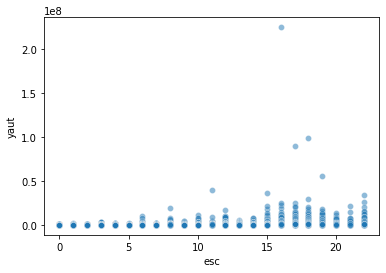

In [5]:

sns.scatterplot(data=df_casen2020, x="esc", y="yaut", alpha=0.5)

## Series de tiempo

En cambio, un tipo diferente de datos son las **Series Temporales** o tambien longitudinales.

En este tipo de información, se tiene diferentes momentos del tiempo (día, semana, mes, año, etc.) para una misma unidad de análisis (individuo, país, empresa, etc)

Ejemplos típicos de series de tiempo son: 
- Datos macroeconómicos (PIB. Inglación, empleo, etc.)
- Financieros (precios de acciones)
- Empresariales (Ventas, costos, etc...)


In [6]:
#Ejemplo datos de acciones

#Usemos la api de Yahoo finance: pip install yahoo_fin y pip install requests_html

from yahoo_fin.stock_info import get_data

amazon_weekly= get_data("amzn", start_date="12/04/2009", end_date="12/04/2019", index_as_date = False, interval="1wk")
amazon_weekly


,date,open,high,low,close,adjclose,volume,ticker
0,2009-11-30,143.619995,145.910004,135.110001,137.580002,137.580002,31350900,AMZN
1,2009-12-07,138.000000,139.000000,129.820007,134.149994,134.149994,47863000,AMZN
2,2009-12-14,132.500000,132.610001,125.650002,128.479996,128.479996,45794900,AMZN
3,2009-12-21,130.479996,139.699997,130.190002,138.470001,138.470001,32406000,AMZN
4,2009-12-28,139.750000,142.580002,134.520004,134.520004,134.520004,28600700,AMZN
...,...,...,...,...,...,...,...,...
518,2019-11-04,1801.010010,1815.060059,1774.040039,1785.880005,1785.880005,11461600,AMZN
519,2019-11-11,1778.000000,1786.219971,1732.859985,1739.489990,1739.489990,13165500,AMZN
520,2019-11-18,1738.300049,1762.520020,1722.709961,1745.719971,1745.719971,13042300,AMZN
521,2019-11-25,1753.250000,1824.689941,1753.239990,1800.800049,1800.800049,11616400,AMZN


<AxesSubplot:xlabel='date', ylabel='open'>

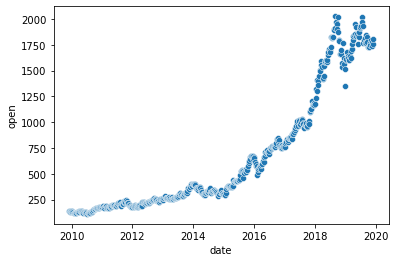

In [7]:
sns.scatterplot(data=amazon_weekly, y="open", x="date")

#### Uso series de tiempo

La información temporal(de series de tiempo) permite responder cómo una variable (o más) responde a cambios a través del tiempo.
- ¿Cuál es el efecto causal dinámico de Xt sobre Yt? 
- ¿Cuál es la mejor predicción del valor de Y en el futuro?
  
**PERO su uso sin cuidado puede llevarnos a conclusiones MUY equiviocadas**


![Ejemplo idotamente peligroso](slide_figuras/spurius.png)


(Fuente: [https://www.tylervigen.com/spurious-correlations](https://www.tylervigen.com/spurious-correlations))

Trabajar con series de tiempo no es para nada sencillo: **necesitaremos técnicas nuevas.**

¿Por qué? 

Necesitaremos modelos sofisticados de errores y técnicas para estimarlos, por ciertas dieferencias en la naturaleza del **proceso generador de datos**

## Panel

El último tipo de datos, es lo que se llama un panel. Este es la combinacion de los dos tipos anteriores, donde para un conjunto de individuos tenemos varias observaciones en el tiempo.

Suele ser el tipo de datos más completo, pero tabien más dificil de conseguir. Además, enfrenta los problemas típicos de ambos tipos anteriores, dependiendo si es un panel corto o largo.

Una alternativa a etsos son los llamados pooled cross section.

Ela análisis de este tipo de datos escapa a los objetivos del taller, pero una introducción pueden revisarla en Stock y Watson Cap. 10.



# Corte transversal vs series de tiempo

## Muestras en corte transversal

En corte transversal solemos trabajar con **MUESTRAS**

![Corte transversal](slide_figuras/datos_ct.png)

Estimamos modelos de la forma:
$$ y_{i}=\beta_{0}+\beta_{1}x_{1i}+\dots+\beta_{1}x_{ki}+u_{i} $$

Estos modelos representan una correlación marginal en las observaciones entre y y x's  (escalada por la varianza de x) y para que podamos interpretarlas causalmente tenemos varias condiciones o supuetsos que de sedeb cumplir.

Uno de estos, es el **supuesto de exogeneidad**: $$  E[u_{i}|X_{i}]=0 $$

Sin embargo, esta forma de ver este supuesto es una **simplificación** ya que, como estamos en una uestra aleatoria, no tenemos que verificar que los efectos cruzados tambien sean exogenos:

$$  E[u_{i}|X_{j}]=0 $$

* Esto se daba por cumplido, como consecuencia de que era una muestra aletaoria.
* Lo cual, generalente, ocurre en corte transversal por lo cual cada observación es i.i.d.




## La imposibilidad de la muestra en series de tiempo

En serie de tiempo, nuestro universo es un proceso estocástico:

![Corte transversal](slide_figuras/datos_st.png)

Estimamos modelos de la forma:

$$ y_{t}=\beta_{0}+\beta_{1}x_{1t}+\dots+\beta_{1}x_{kt}+u_{t} $$

* Estamos en presencia de un **proceso estocástico** 
* En cada momento se observa un posible resultado (o realización) del proceso estocásticos.

Esto tiene vaias implicancias:

* NO SON INDEPENDIENTES ya que por construcción, viene del mismo proceso.
* Por lo tanto, el supuesto de exogeneidad **$E[u_{i}|X_{i}]=0 $** NO ES SUFICIENTE
* Requerimos su versión más exigente: (Exogeneidad estricta)
$$E[u_{t}|X_{s}]=0 \qquad \forall s $$

* Este supuesto, generalmente NO SE CUMPLE.
* Si se cumpliese, seguiruíamos operando como siempre con modelos de regresión multiple estándar.

**¿Qué hacer entonces?**

Reconocer los datos como procesos estocásticos e incluir sus particularidades en la modelación. De eso se tratarán los dos siguientes bloques
- Bloque 2: Peculiaridades de los procesos estocasticos y su exploración en la data
- Bloque 3: Modelamiento



# Conceptos propios de las series de tiempo

Dado que una serie de tiempo tiene un orden específico, que en si mismo es importante. En base a este orden se suelen crear nuevos indicadores o variables. Revisemos los más comunes:

## Notación y transformaciones:

**Notación**

* Variables de series de tiempo se denominan con sub-índice t para indicar el perído en el tiempo:   $y_t$
* El total de periodos se suele referir como T.

### Rezagos 

* Un **rezago** es el valor de la variable en períodos anteriores:   
  * Primer rezago: $y_{t-1}$ es el valor 1 período anterior
  * Segundo rezago: $y_{t-2}$ es el valor 2 períodos atrás
  * j-ésimo rezago:  $y_{t-j}$ es el valor j períodos atrás

### Diferencias

Una diferencia corresponde al cambio en una variable entre dos periodos específicos y se usa la notación $\Delta$

* Primera diferencia: $$\Delta y_t = y_t- y_{t-1}$$

### Tasas de crecimiento

Si calculamos la primera diferencia el logaritmo natural, podemos obtener incorporar la tasa de crecimiento en una regresión:

* Primera diferencia en logs:
  $$ \Delta ln(y_{t})=ln(y_{t})-ln(y_{t-1}) $$

* Cambio porcentual de $y_t$  entre $t -1$ y $t\approx  100\times \Delta ln(y_{t})$

## Tipos de modelos

 ### Modelo estático 

 Se modela la relación contemporánea entre dos variables, i.e., relación en el mismo momento en el tiempo

$$y_{t}=\beta_{0}+\beta_{1}z_{t}+u_{t}$$

Ejemplos:
* Modelo Simple:
$$ inflación_{t}=\beta_{0}+\beta_{1}desempleo_{t}+u_{t}$$

* Modelo múltiple:
$$ homicidio_{t}=\beta_{0}+\beta_{1}condena_{t}+\beta_{2}desmepleo_{t}+\beta_{3}hombres_{t}+u_{t} $$

 ### Modelo dinámico

 Se incluyen efectos temporales, que se piensan que tienen que ver con **tendencias**, **inercia** o **estacionalidades**

 $$ inflación_{t}=\beta_{0}+\beta_{1}desempleo_{t}+\beta_{2} inflación_{t-1} +u_{t}$$

# Pandas y series de tiempo

* Pandas fue desarrollado originalmente para trabajar con datos financieros.
* Como las series temporales son un tipo de datos comunes encontrados en aplicaiones de finanzas, naturalmente pandas tiene muy buen soporte para la mayoria de operaciones comunes.


* `pd.to_datetime()` : conviere una serie o valor en un timestamp
  * Este formato permite un mejor manejo de las series.

In [61]:
#pandas remote data access support for calls to the World Bank Indicators API
from pandas_datareader import data, wb #instalar conda install pandas-datareader  o  pip installpandas-datareader

In [9]:
#Revisemos que indicadores hay disponibles. En este caso revisare de PIB (GDP en ingés), pero se pueden explorar muchas más opciones.

wb.search('gdp.*capita.*const')


,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10384,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10386,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10388,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10389,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [62]:
# Obtengamos la lista de paises disponibles
countries=wb.get_countries()

#Preview primeras filas lista de paises
countries[:5]

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [63]:
#sabemos que queremos Chile, asi que busquemos su info

countries[ countries['name'] == 'Chile' ]


,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
49,CHL,CL,Chile,Latin America & Caribbean,,High income,IBRD,Santiago,-70.6475,-33.475


In [64]:
# Descarguemos la data desde la API del banco muncial a un dataframe

df_GPDpc_Chile = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['CL'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020,
                )

#Veamos el data frame
df_GPDpc_Chile.head(10)

NY.GDP.PCAP.KD
country year                
Chile   2020    12954.405354
        2019    13866.955843
        2018    13901.018309
        2017    13590.991346
        2016    13624.678549
        2015    13574.169238
        2014    13425.683275
        2013    13333.346834
        2012    12941.029999
        2011    12406.413571

In [12]:
wb.download( indicator=['NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.KD'], country=['CL'], start=2008, end=2010 )

NY.GDP.PCAP.PP.KD  NY.GDP.PCAP.KD
country year                                   
Chile   2010       21262.466986    11809.141627
        2009       20298.250925    11273.617502
        2008       20840.404214    11574.728609

<AxesSubplot:xlabel='year', ylabel='NY.GDP.PCAP.KD'>

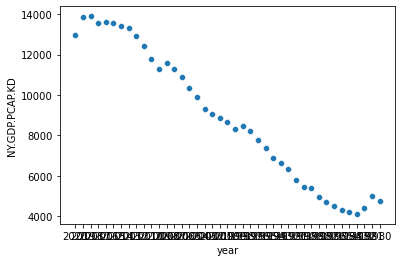

In [13]:
sns.scatterplot(data=df_GPDpc_Chile, x="year", y="NY.GDP.PCAP.KD")

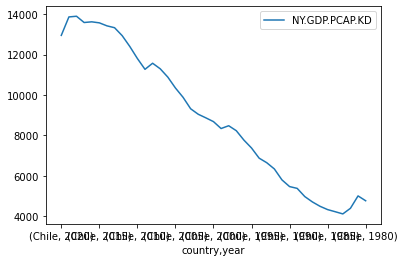

In [14]:
ax = df_GPDpc_Chile.plot(legend=True)

# Ejemplos

## 1. PIB de EEUU

Empecemos con un ejemplo muy clásico de series de tiempo, con datos del PIB de Estados Unidos

In [65]:
GDP = pd.read_csv('data/GDP.csv', parse_dates=['DATE'])
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    290 non-null    datetime64[ns]
 1   GDP     290 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [66]:
GDP.set_index('DATE', inplace=True)
GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     290 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [67]:
GDP.head()

,GDP
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


Text(0, 0.5, 'GDP ($\\$B$)')

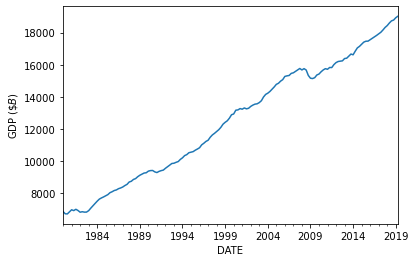

In [68]:
ax = GDP['1980':].plot(legend=False)
ax.set_ylabel(r'GDP ($\$B$)')

Observamos claramente una **tendencia** al alza.

## 2. Mortalidad por influenza

Vemos un segundo ejemplo 

In [19]:
ILI = pd.read_csv('data/CDC.csv')
ILI.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9


In [20]:
ILI['date'] = ILI['Year']+ILI['Week']/52.
ILI.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza,Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,date
0,2012,1,8.479120,8.15718,8.49104,51102,4323,10,2012.019231
1,2012,2,8.343472,8.22181,8.55556,50962,4245,7,2012.038462
2,2012,3,8.370908,8.27534,8.60898,51010,4261,9,2012.057692
3,2012,4,8.448458,8.31696,8.65049,50163,4227,11,2012.076923
4,2012,5,8.140332,8.34602,8.67945,49568,4026,9,2012.096154


Text(0, 0.5, '% Mortality')

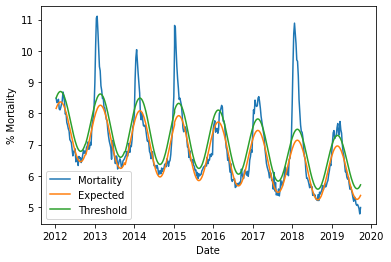

In [21]:
ILI.plot(x='date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax = plt.gca()
ax.legend(['Mortality', 'Expected', 'Threshold'])
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')

El comportamiento es muy diferente, podemos ver una **estacionalidad**.

Es decir hay un cambio periodico asociado al tiempo de la variable.

# Transformaciones

En base a estos conceptos, entonces, es muy comun realizar transformaciones a las series de tiempo ya sea para obtener rezagos, diferencias, tasas de crecimiento, etc.
Ilustraremos varios de estos, con el dataset del DOw-Jonses indsutrial Average.


Text(0.5, 0, 'Date')

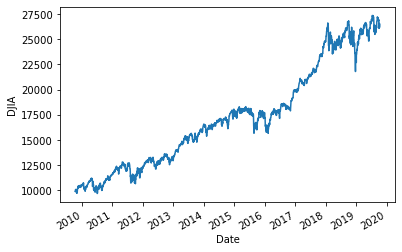

In [22]:
DJIA = pd.read_csv('data/DJIA.csv', parse_dates=['DATE'], na_values='.').dropna()
DJIA.plot(x='DATE', legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')



## Diferencias

Una manera de remover tendencias de un dataset es diferenciandolo. Como nuestros datasets son discretos, usaremos diferencias finitas.

In [23]:
def differentiate(values, d=1):
    # First value is required so that we can recover the original values with np.cumsum
    x = np.concatenate([[values[0]], values[1:]-values[:-1]])

    if d == 1:
        return x
    else:    
        return difference(x, d - 1)

In [24]:
values = DJIA['DJIA'].values
differences = differentiate(values)

Como podemos ver, el grafico se ve mucho más estacionario.

Text(0, 0.5, 'Differences')

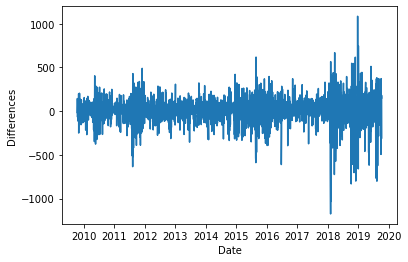

In [25]:
plt.plot(DJIA['DATE'].iloc[1:], differences[1:])
plt.xlabel('Date')
plt.ylabel('Differences')

Para recuperar la data original, basta con integrar los puntos diferenciados. 

In [69]:
def integrate(values, d=1):
    x = np.cumsum(values)
    
    if d == 1:
        return x
    else:
        return integrate(x, d-1)

In [27]:
rebuilt = integrate(differences)

Y un chequeo rapido para ver que son los mismos valores

In [28]:
np.mean(rebuilt-values)

0.0

## Windowing

Muchas veces queremos calcular variables de cuerta cantidad en una ventana de datos.


In [29]:
def rolling(x, order):
    npoints = x.shape[0]
    running = []
    
    for i in range(npoints-order+1):
        running.append(x[i:i+order])
        
    return np.array(running)


In [31]:
#And a simple example
values = np.arange(11)
values
rolling(values, 6)


array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])


Como tenemos un array con todas las ventanas, esto facilita el calculo de medias moviles o otras variables que requieran calculo iterativo en ciertos intervalos.

In [33]:

rolling(values, 2)
rolling(values, 2).mean(axis=1)


array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [34]:
#Or the running maximum, etc.

rolling(values, 2).max(axis=1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Exponential Smoothing
Another form of smoothing a noise time series is called exponential smoothing. This is equivalent to an exponentially weighted running average where past values get exponentially reduced.


In [35]:

def ES(values, alpha= 0.05):
    N = len(values)
    S = [values[0]*alpha]
    
    for i in range(1, N):
        S.append(alpha*values[i]+(1-alpha)*S[-1])
        
    return np.array(S)


Podemos ver rapidamente, que mientras menor es el valor del alpha, menos ruidosa (o más suave) es el resultado.

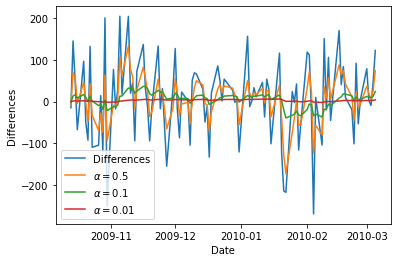

In [70]:

smooth = []
smooth.append(ES(differences[1:], 0.01))
smooth.append(ES(differences[1:], 0.1))
smooth.append(ES(differences[1:], 0.5))
plt.plot(DJIA['DATE'].iloc[1:100], differences[1:100], label='Differences')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[2][:99], label=r'$\alpha=0.5$')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[1][:99], label=r'$\alpha=0.1$')
plt.plot(DJIA['DATE'].iloc[1:100], smooth[0][:99], label=r'$\alpha=0.01$')
plt.xlabel('Date')
plt.ylabel('Differences')
plt.legend()

## Missing Data

Desafortunadamente, los datos no siempre están limpios o completos, lo que nos obliga a lidiar datos faltantes. Aquí ilustramos varios enfoques para introducir valores perdidos. Comenzamos generando un conjunto de datos con valores perdidos.


In [38]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
y_missing = y.copy()
y_missing[40:55] = np.nan


This is simply a cosine function with a few missing values at the peak.


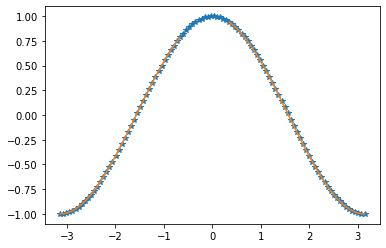

In [39]:
plt.plot(x, y, '*')
plt.plot(x, y_missing)


Quizás la estrategia más común es simplemente mantener el último valor 'bueno' conocido y usarlo para completar los puntos de datos faltantes. Este enfoque no puede lidiar con los valores faltantes al comienzo del conjunto de datos. 


In [40]:
def ffill(y):
    y0 = y.copy()
    N = len(y0)
    
    current = None
    for i in range(1, N):
        if np.isnan(y0[i]):
            y0[i] = current
        else:
            current = y0[i]
    
    return y0


Naturalmente, el enfoque opuesto también es común cuando usamos el siguiente valor bueno. De esta manera podemos manejar fácilmente los valores perdidos iniciales, pero no podemos hacer nada con los valores perdidos al final de la serie de tiempo.



In [41]:

def bfill(y):
    y0 = y.copy()
    N = len(y0)
    
    current = None
    for i in range(N-1, 0, -1):
        if np.isnan(y0[i]):
            y0[i] = current
        else:
            current = y0[i]
    
    return y0


Back-fill y Forward-fill son enfoques simples pero poderosos para lidiar con los datos faltantes. Sin embargo, a menudo queremos tener más cuidado con el valor que atribuimos. Un enfoque común es interpolar entre el valor anterior y el siguiente y conectarlos con una línea recta.



In [42]:
def interpolate(y):
    y0 = y.copy()
    N = len(y0)
    
    pos = 0
    while pos < N:
        if np.isnan(y0[pos]):
            count = 0
            
            while np.isnan(y0[pos+count]):
                count += 1
            
            current = y0[pos-1]
            future = y0[pos+count]
            slope = (future-current)/count
            
            y0[pos:pos+count] = current + np.arange(1, count+1)*slope
            
            pos += count
        else:
            pos += 1
            
    return y0


La imputación de datos (el cálculo de los valores perdidos esperados) es un gran subcampo de estadísticas con una amplia gama de técnicas y enfoques. 

In [44]:


y_bfill = bfill(y_missing)
y_ffill = ffill(y_missing)
y_inter = interpolate(y_missing)


Y graficamos para ver las diferencias.

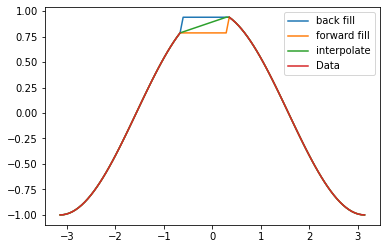

In [45]:


plt.plot(x, y_bfill, label='back fill')
plt.plot(x, y_ffill, label='forward fill')
plt.plot(x, y_inter, label='interpolate')
plt.plot(x, y_missing, label='Data')
plt.legend()

## Resampling

En muchos casos, también necesitamos cambiar la frecuencia a la que estamos operando. Por ejemplo, nuestro conjunto de datos DJIA tiene valores al final del día, pero podríamos estar interesados en puntos de datos semanales o mensuales. El remuestreo es una serie de técnicas diseñadas para lidiar con esta situación y es similar en espíritu a las técnicas de ventanas que vimos anteriormente. La principal diferencia es que en lugar de simplemente mover la ventana en un paso fijo, cada ventana corresponde a nuestro período de interés.


In [46]:
mapping = DJIA['DATE'].dt.year
values = DJIA['DJIA'].values



En el caso más simple, simplemente calculamos cuál es la ventana correcta para cada punto de datos y la agregamos en consecuencia.

In [47]:

def groupBy(values, mapping, func = None):
    agg = {}
    pos = {}
    
    for i in range(values.shape[0]):
        key = mapping.iloc[i]
        
        if key not in agg:
            agg[key] = []
        
        pos[key] = i
        
        if not np.isnan(values[i]):
            agg[key].append(values[i])
        
    order = sorted(agg.keys())
    
    if func is not None:
        for key in agg:
            agg[key] = func(np.array(agg[key]).astype('float'))
            
    return agg, pos


Naturalmente, esta función groupBy es útil no solo para remuestrear sino también para una amplia gama de análisis estadísticos. Además de un mapeo, también debemos especificar qué función de agregación queremos usar. ¿Nos interesa el valor medio? ¿el maximo? ¿Desviación Estándar?

In [48]:
agg, pos = groupBy(values, mapping, np.mean)

Aca simplemente calculamos la media por año

In [49]:
agg

{2009: 10232.334385964914,
 2010: 10668.589087301589,
 2011: 11957.570238095239,
 2012: 12965.28744,
 2013: 15009.523492063492,
 2014: 16777.690912698414,
 2015: 17587.029166666664,
 2016: 17927.107341269842,
 2017: 21750.20374501992,
 2018: 25046.85734939759,
 2019: 26000.832040816327}

Como nuestra función groupBy también devuelve las posiciones de índice de la última vez que se vio cada bin, podemos comparar fácilmente los datos originales con los muestreados nuevamente.

Text(0.5, 0, 'Date')

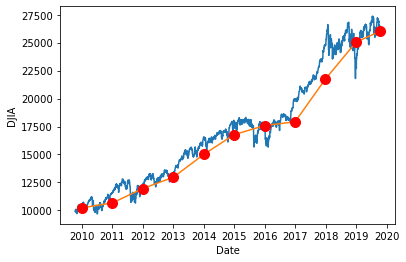

In [50]:

aggregated = []

for key in pos:
    aggregated.append([pos[key], agg[key]])

aggregated = np.array(aggregated)
aggregated
plt.plot(DJIA['DATE'], DJIA['DJIA'])
ax = plt.gca()
ax.plot(DJIA.set_index('DATE').index[aggregated.T[0].astype('int')], aggregated.T[1])
ax.plot(DJIA.set_index('DATE').index[aggregated.T[0].astype('int')], aggregated.T[1], 'ro', markersize=10,)
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

## Jackknife estimators

Finalmente, en muchos casos queremos estimar cantidades estadísticas de series de tiempo. Un ejemplo obvio podría ser estimar la media móvil de una serie sin tendencia para verificar si de hecho está lo suficientemente cerca de cero para ser considerada estacionaria.

El estimador JackKnife nos permite obtener no solo el valor esperado en cuestión, sino también una medida de su varianza. Esto se logra mediante el uso de un enfoque de omisión para calcular N estimaciones de nuestra métrica. A partir de esta población de estimación, podemos obtener los promedios como la mejor estimación posible y la desviación estándar como una medida de las barras de error involucradas.


In [51]:
def jackknife(x, func, variance = False):
    N = len(x)
    pos = np.arange(N)
    values = [func(x[pos != i]) for i in pos]
    jack = np.sum(values)/N
    
    if variance:
        values = [np.power(func(x[pos != i]) - jack, 2.0) for i in pos]
        var = (N-1)/N * np.sum(values)
        return jack, var
    else:
        return jack

In [52]:
x = np.random.normal(0, 2, 100)
print(x.std())
jackknife(x, np.std, True)

1.8994140828534198


(1.8992558510791335, 0.023063797890560296)


Con jackknife obtenemos no solo una estimación del valor sino también una medida del error

## Bootstrapping

Otra técnica común para estimar propiedades estadísticas se conoce como bootstrapping y está estrechamente relacionada con Jackknife. En este enfoque, simplemente tomamos muestras (con reemplazo) de la población original para obtener una medida de cuánta variabilidad se puede esperar.


In [53]:
def bootstrapping(x, n_samples, func=np.mean):
    y = x.copy()
    N = len(y)
    population = []
    
    for i in range(n_samples):
        population.append(func(np.random.choice(y, N, replace=True)))
        
    return np.array(population)


Podemos generar fácilmente un histograma de las muestras bostrappeadas

In [54]:
def histogram(values, n_bins=100):
    xmax = values.max()
    xmin = values.min()
    delta  = (xmax-xmin)/n_bins
    
    counts = np.zeros(n_bins+1, dtype='int')
    
    for value in values:
        val_bin = np.around((value-xmin)/delta).astype('int')
        counts[val_bin] += 1.0
    
    bins = xmin+delta*np.arange(n_bins+1)
    
    return bins, counts/values.shape[0]


In [55]:
  
x = np.random.normal(0, 2, size=100)


In [56]:

boot = bootstrapping(x, 1000)


In [57]:

x.mean()


-0.22862039068812348

In [58]:
x.std()


1.7922436343752959

In [59]:
bins, counts = histogram(boot)


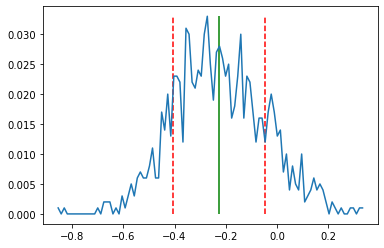

In [60]:
plt.plot(bins, counts)
plt.vlines(x=boot.mean(), ymin=0, ymax=counts.max(), label='mean', color='g')
plt.vlines(x=boot.mean()+boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--', color='r')
plt.vlines(x=boot.mean()-boot.std(), ymin=0, ymax=counts.max(), label='std', linestyles='--', color='r')


# Actividad Bloque 1:

1. Siga este ejemplo practico de importar datos desde la API del Banco Mundial y preparar la base para su análisis de series de tiempo.
2. Importe usted la serie de GDP total Y Percapita para otro país serie desde la API del Banco mundial, muestre sus principales características y realice un grafico. 
3. Obtenga las primeras diferencias y compare, ¿pareciera haber tendencias?

In [72]:
#pandas remote data access support for calls to the World Bank Indicators API
from pandas_datareader import data, wb #instalar conda install pandas-datareader  o  pip installpandas-datareader

#Revisemos que indicadores hay disponibles. En este caso revisare de PIB (GDP en ingés), pero se pueden explorar muchas más opciones.

wb.search('gdp')


,id,name,unit,source,sourceNote,sourceOrganization,topics
711,5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,b'World Development Indicator (WDI) databank. ...,
713,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
714,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
715,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
...,...,...,...,...,...,...,...
16297,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16298,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
16299,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16300,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [ ]:
# Obtengamos la lista de paises disponibles
countries=wb.get_countries()

#Preview primeras filas lista de paises
countries[:5]

In [ ]:
#sabemos que queremos Chile, asi que busquemos su info

countries[ countries['name'] == 'Chile' ]

In [ ]:
# Descarguemos la data desde la API del banco muncial a un dataframe

df_GPDpc_Chile = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['CL'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

#Veamos el data frame
df_GPDpc_Chile.head(10)

In [ ]:
wb.download( indicator=['NY.GDP.PCAP.PP.KD','NY.GDP.PCAP.KD'], country=['CL'], start=2008, end=2010 )

In [ ]:
sns.scatterplot(data=df_GPDpc_Chile, x="year", y="NY.GDP.PCAP.KD")